Introduction: Short-term asset return is a challenging quantity to predict. Efficient markets produce near-Normal daily returns with no significant correlation between $r_t$ , $r_{t−1}$. This exercise is a limited exercise in supervised learning. You are expected to explore multiple features or may use a set of features from Table 1 without an expectation of predictive powers. Original and final selected features should be sufficiently large.

# Objective
Your objective is to produce a model to predict positive moves (up trend) using machine learning models as specified in the below section. Your proposed solution should be comprehensive with the detailed feature engineering and model architecture.

- Choose one ticker of your interest from the index, equity, ETF, crypto token, or commodity.
- Predict trend only, for a short-term return (example: daily, 6 hours). Limit prediction to binomial classification: the dependent variable is best labeled [0, 1]. Avoid using [-1, 1] as class labels.
- Analysis should be comprehensive with detailed feature engineering, data pre-processing, model building, and evaluation.

Devise your own approach on how to categorise extremely small near-zero returns (drop from training sample, group with positive/negative). The threshold will strongly depend on your ticker. Example: small positive returns below 0.25% can be labelled as negative.

**Table 1: Features List**

| Feature        | Formula                                                                 | Description               |
|----------------|-------------------------------------------------------------------------|---------------------------|
| O-C, H-L       | Open - Close, High - Low                                                | intraday price range      |
| Sign           | sign $[rt = ln \frac{P_t}{P_{t-1}}$]                                  | sign of return or momentum|
| Past Returns   | $r_{t-1}, r_{t-2}, \ldots$                                            | lagged returns            |
| Momentum       | $P_t - P_{t-k}$                                                       | price change over k period|
| Moving Average | $SMA_i = \frac{1}{n}\sum_{i=0}^{n-1} P_{t-i}$                         | simple moving average     |
| Exponential MA | $EMA_i = EMA_{i-1} + \alpha (P_t - EMA_{i-1})$ | recursive, $\alpha = \frac{2}{(N_{obs} + 1)}$ |

Number of features to include is a design choice. There is no one recommended set of features for all assets. Length of dataset is another design choice. If predicting short-term return sign (for daily move), then training and testing over up to 5-year period should be sufficient. Making sense of instructions below is part of the task.

# Questions

1. What is the cost function of Logistic Regression? Explain in Detail.
2. What are voting classifiers in ensemble learning?
3. Follow the 7-steps to model building for your selected ticker,

    - produce a model to predict positive moves (up trend) using Support Vector Machine (SVM) model.
    - tune hyperparameters for the estimator and present the best model.
    - investigate the prediction quality using area under ROC curve, confusion matrix and classification report.

Note: Choice of kernels and number of hyperparameters to be optimized for the best model are design choices.


<br>

***

<br>

# Answer

## 1. What is the cost function of Logistic Regression? Explain in Detail.

Imagine you want to determine whether a coin will land heads up. Logistic regression is like a small robot that "predicts heads." It provides a "probability of heads" based on input data (such as features). We then tell the robot whether its prediction was correct or not, and use a "cost function" to measure the extent of its "error" or "penalty." A higher value indicates a greater mistake, while a lower value means the prediction was closer to being correct.

The commonly used cost function in logistic regression is called cross entropy. Its mathematical formula might appear lengthy, and it is expressed as:

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]$$

In simple terms, after each guess the machine makes, we evaluate how accurately it scores "heads." If it assigns a very low probability to an obviously heads scenario or a very high probability to an obviously tails scenario, these are considered errors. We then sum up all these errors to calculate a "total error" score.

<br>

***

<br>

## 2. What are voting classifiers in ensemble learning?

Imagine you have several classmates, and each of them needs to answer questions such as "Will it rain today?"

- Some students' approach is to "check the weather forecast."
- Some students use the method of "checking how many clouds there are."
- Some students are just making a wild guess.

While individual students may not always be correct, gathering their votes and letting the majority opinion determine the conclusion is generally more reliable than relying on a single person. This is the essence of the **Voting Classifier**: it aggregates the predictions of multiple models and selects the one with the most votes.

<br>

***

<br>

## 3. Create the  predictive model in 7 steps (using Support Vector Machine)

1. **Select the stock or commodity (referred to as "Ticker", and in this case, SP500 index)** <br> I want to predict the rise or fall of SP500 index.

2. **Collecting and organizing data (feature engineering, data cleaning)**

    - Retrieve the stock's price, trading volume, and other data daily.
    - Clean the data (e.g., by addressing missing values or unusual data points).
    - Generate new features (e.g., average price over the past few days, rate of increase, etc.).

3. **Classify "labels" as 0 or 1**

    - If the market is up for the day, label it as 1; if it is down or unchanged, label it as 0.

4. **Model selection: Utilizing Support Vector Machine (SVM)**

    - Support vector machines aim to draw a "dividing line" among a set of data points, effectively separating "rising" points from "non-rising" points.

5. **Tune hyperparameters (fine-tune the model)**

    - Experiment multiple times with the "soft margin coefficient C" and "kernel function parameters" of the model to find the best combination.
    - This process involves testing different parameter combinations to determine which one improves your model's predictive performance.

6. **Evaluate the model (check its performance)**

    - The "Area Under the ROC Curve" (AUC) is used to evaluate the model's overall predictive performance. A score closer to 1 indicates better prediction accuracy.
    - Review the "Confusion Matrix" to see how many rises and non-rises were accurately predicted, as well as how many predictions were incorrect.
    - The "Classification Report" also includes metrics such as precision and recall, offering a more detailed evaluation of prediction performance.

7. **Summarize and enhance**

    - Observe the results; if the performance is unsatisfactory, consider adjusting the features or experimenting with different algorithms.
    - Finally, compile the best model and its optimization process into a report, detailing the reasons for selecting these methods and the insights gained from them.

Best parameter combination: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Confusion matrix:
 [[ 92  16]
 [ 26 117]]
Classification report:
               precision    recall  f1-score   support

           0     0.7797    0.8519    0.8142       108
           1     0.8797    0.8182    0.8478       143

    accuracy                         0.8327       251
   macro avg     0.8297    0.8350    0.8310       251
weighted avg     0.8367    0.8327    0.8333       251

AUC: 0.9276094276094276


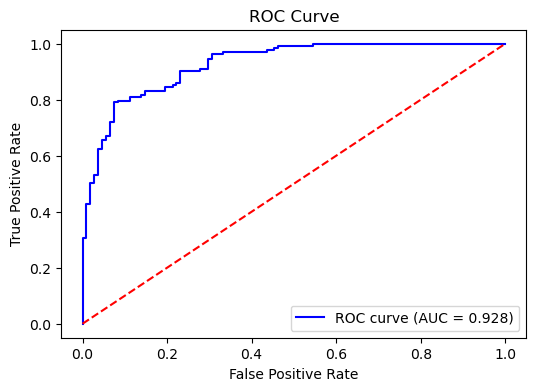

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# =========================
# 1. Read local CSV data
# =========================
df = pd.read_csv('historical_data.csv', parse_dates=['Date'])

# Rename columns to ensure consistency with subsequent code logic
# Original CSV column names are: ['Date','Close/Last','Open','High','Low']
# Here, change 'Close/Last' to 'Close'
df.rename(columns={'Close/Last': 'Close'}, inplace=True)

# Sometimes the data in the file is sorted in reverse chronological order (latest at the top), we usually want to calculate returns in chronological order
df.sort_values('Date', inplace=True)

# Set the date column as the index
df.set_index('Date', inplace=True)

# =========================
# 2. Data preprocessing & feature engineering
# =========================

# If there are invalid/empty rows in the data, drop them
df = df.dropna()

# Calculate daily returns
df['Return'] = df['Close'].pct_change()

# Feature 1: O-C, H-L
df['O_C'] = df['Open'] - df['Close']
df['H_L'] = df['High'] - df['Low']

# Feature 2: Lagged returns of the past two days
df['Return_1'] = df['Return'].shift(1)
df['Return_2'] = df['Return'].shift(2)

# Feature 3: Simple Moving Average (SMA, 5-day example)
df['SMA_5'] = df['Close'].rolling(window=5).mean()

# Feature 4: Exponential Moving Average (EMA, 5-day example)
df['EMA_5'] = df['Close'].ewm(span=5, adjust=False).mean()

# Since rolling/shift will cause NaN in the first few rows, drop these missing values
df.dropna(inplace=True)

# =========================
# 3. Construct target variable (y label)
# =========================
# If the return on the day is > 0, label as 1, otherwise 0
df['Target'] = np.where(df['Return'] > 0, 1, 0)

# =========================
# 4. Select features and split data
# =========================
features = ['O_C', 'H_L', 'Return_1', 'Return_2', 'SMA_5', 'EMA_5']
X = df[features]
y = df['Target']

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# =========================
# 5. Train using SVM model
# =========================
svm_clf = SVC(probability=True, kernel='rbf', C=1.0, gamma='scale')
svm_clf.fit(X_train, y_train)

# =========================
# 6. Grid search for hyperparameter tuning
# =========================
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}
grid_search = GridSearchCV(svm_clf, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Best parameter combination:", grid_search.best_params_)

# =========================
# 7. Model evaluation
# =========================
y_pred = best_model.predict(X_test)
y_score = best_model.predict_proba(X_test)[:, 1]  # For plotting ROC curve

# (1) Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

# (2) Classification report (Precision, Recall, F1-score, etc.)
report = classification_report(y_test, y_pred, digits=4)
print("Classification report:\n", report)

# (3) ROC curve & AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Code explanation:

1. Retrieve historical data for the S&P 500
2. Feature engineering include: O-C, H-L, lagged returns (Return_1, Return_2), SMA_5, EMA_5.
3. Label daily returns as 1 if they are positive (>0), otherwise label them as 0.
4. Train using SVM and perform hyperparameter grid search with GridSearchCV, which automatically selects the optimal C, gamma, and kernel.
5. Finally, the model is evaluated using the confusion matrix, classification report (Precision, Recall, F1-score), and ROC-AUC.